In [3]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch
import torch.utils.data
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root = "./data/", 
                                                train = True, transform = trans, download = True)
mnist_test = torchvision.datasets.FashionMNIST(root = "./data/", 
                                               train = False, transform = trans, download = True)

In [7]:
class Model_1(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_1, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*13*13, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_2(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.Sigmoid(),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*13*13, 256),
            nn.Sigmoid(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_3(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_3, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.Tanh(),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*13*13, 256),
            nn.Tanh(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_4(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_4, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*13*13, 256),
            nn.LeakyReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

device is cuda:0
Epoch:1 | Step:   500 | train_loss: 0.554
Epoch:1 | Step:  1000 | train_loss: 0.376
Epoch:1 | Step:  1500 | train_loss: 0.338
Epoch:2 | Step:   500 | train_loss: 0.274
Epoch:2 | Step:  1000 | train_loss: 0.272
Epoch:2 | Step:  1500 | train_loss: 0.259
Epoch:3 | Step:   500 | train_loss: 0.221
Epoch:3 | Step:  1000 | train_loss: 0.218
Epoch:3 | Step:  1500 | train_loss: 0.219
Epoch:4 | Step:   500 | train_loss: 0.178
Epoch:4 | Step:  1000 | train_loss: 0.183
Epoch:4 | Step:  1500 | train_loss: 0.193
Epoch:5 | Step:   500 | train_loss: 0.151
Epoch:5 | Step:  1000 | train_loss: 0.158
Epoch:5 | Step:  1500 | train_loss: 0.159
Epoch:6 | Step:   500 | train_loss: 0.122
Epoch:6 | Step:  1000 | train_loss: 0.137
Epoch:6 | Step:  1500 | train_loss: 0.129
Epoch:7 | Step:   500 | train_loss: 0.103
Epoch:7 | Step:  1000 | train_loss: 0.112
Epoch:7 | Step:  1500 | train_loss: 0.115
Epoch:8 | Step:   500 | train_loss: 0.082
Epoch:8 | Step:  1000 | train_loss: 0.090
Epoch:8 | Step:  

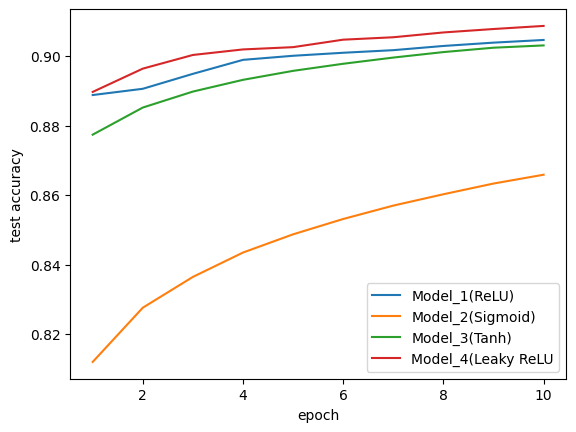

In [10]:
def main():
    # 指定设备
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('device is %s' % device)

    # 数据处理
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(0.5, 0.5)]
    )

    # 导入训练数据
    train_data = torchvision.datasets.FashionMNIST(root='./data', train=True,
                       transform=transform, download=True)
    train_data = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)

    # 导入测试数据
    test_data = torchvision.datasets.FashionMNIST(root='./data', train=False,
                      transform=transform, download=True)
    test_data = torch.utils.data.DataLoader(test_data, shuffle=True, num_workers=4)

    # 构造网络
    net_1 = Model_1()
    net_1.to(device)

    net_2 = Model_2()
    net_2.to(device)

    net_3 = Model_3()
    net_3.to(device)

    net_4 = Model_4()
    net_4.to(device)

    loss_function = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(net_1.parameters(), lr=0.001)
    optimizer_2 = optim.Adam(net_2.parameters(), lr=0.001)
    optimizer_3 = optim.Adam(net_3.parameters(), lr=0.001)
    optimizer_4 = optim.Adam(net_4.parameters(), lr=0.001)

    # 训练网络
    # net_1.train()  None BN and Dropout
    num_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    correct_1 = 0
    total_1 = 0
    accuracy_1 = []

    correct_2 = 0
    total_2 = 0
    accuracy_2 = []

    correct_3 = 0
    total_3 = 0
    accuracy_3 = []

    correct_4 = 0
    total_4 = 0
    accuracy_4 = []

    # Model_1
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_1.zero_grad()
            outputs = net_1(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_1.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_1(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_1 += labels.size(0)
                correct_1 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_1.append(correct_1 / total_1)
    print('Model_1 Finished')

    # Model_2
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_2.zero_grad()
            outputs = net_2(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_2.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_2(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_2 += labels.size(0)
                correct_2 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_2.append(correct_2 / total_2)
    print('Model_2 Finished')

    # Model_3
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_3.zero_grad()
            outputs = net_3(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_3.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_3(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_3 += labels.size(0)
                correct_3 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_3.append(correct_3 / total_3)
    print('Model_3 Finished')

    # Model_4
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_4.zero_grad()
            outputs = net_4(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_4.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_4(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_4 += labels.size(0)
                correct_4 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_4.append(correct_4 / total_4)
    print('Model_4 Finished')

    plt.figure()
    plt.plot(num_epochs, accuracy_1, label='Model_1(ReLU)')
    plt.plot(num_epochs, accuracy_2, label='Model_2(Sigmoid)')
    plt.plot(num_epochs, accuracy_3, label='Model_3(Tanh)')
    plt.plot(num_epochs, accuracy_4, label='Model_4(Leaky ReLU')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.legend(loc='best')
    plt.show()


if __name__ == '__main__':
    main()

In [6]:
class Model_1(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_1, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*13*13, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_2(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            # 特征图大小：32@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：32@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(32*13*13, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_3(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_3, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 48, kernel_size=3),
            # 特征图大小：48@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：48@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(48*13*13, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_4(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_4, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3),
            # 特征图大小：64@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：64@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(64*13*13, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

device is cuda:0
Epoch:1 | Step:   500 | train_loss: 0.560
Epoch:1 | Step:  1000 | train_loss: 0.402
Epoch:1 | Step:  1500 | train_loss: 0.347
Epoch:2 | Step:   500 | train_loss: 0.295
Epoch:2 | Step:  1000 | train_loss: 0.282
Epoch:2 | Step:  1500 | train_loss: 0.268
Epoch:3 | Step:   500 | train_loss: 0.221
Epoch:3 | Step:  1000 | train_loss: 0.233
Epoch:3 | Step:  1500 | train_loss: 0.226
Epoch:4 | Step:   500 | train_loss: 0.191
Epoch:4 | Step:  1000 | train_loss: 0.194
Epoch:4 | Step:  1500 | train_loss: 0.201
Epoch:5 | Step:   500 | train_loss: 0.164
Epoch:5 | Step:  1000 | train_loss: 0.162
Epoch:5 | Step:  1500 | train_loss: 0.169
Epoch:6 | Step:   500 | train_loss: 0.138
Epoch:6 | Step:  1000 | train_loss: 0.143
Epoch:6 | Step:  1500 | train_loss: 0.141
Epoch:7 | Step:   500 | train_loss: 0.110
Epoch:7 | Step:  1000 | train_loss: 0.123
Epoch:7 | Step:  1500 | train_loss: 0.122
Epoch:8 | Step:   500 | train_loss: 0.099
Epoch:8 | Step:  1000 | train_loss: 0.102
Epoch:8 | Step:  

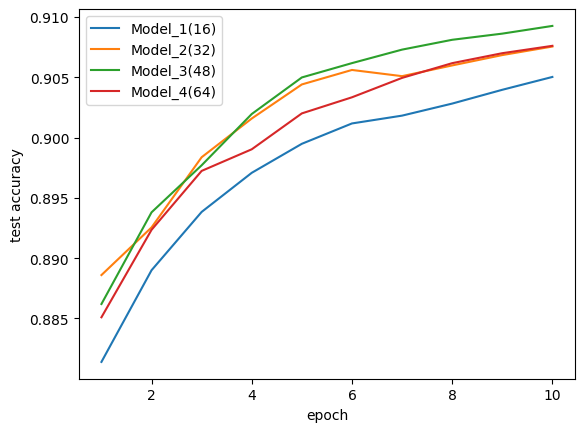

In [7]:
def main():
    # 指定设备
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('device is %s' % device)

    # 数据处理
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(0.5, 0.5)]
    )

    # 导入训练数据
    train_data = torchvision.datasets.FashionMNIST(root='./data', train=True,
                       transform=transform, download=True)
    train_data = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)

    # 导入测试数据
    test_data = torchvision.datasets.FashionMNIST(root='./data', train=False,
                      transform=transform, download=True)
    test_data = torch.utils.data.DataLoader(test_data, shuffle=True, num_workers=4)

    # 构造网络
    net_1 = Model_1()
    net_1.to(device)

    net_2 = Model_2()
    net_2.to(device)

    net_3 = Model_3()
    net_3.to(device)

    net_4 = Model_4()
    net_4.to(device)

    loss_function = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(net_1.parameters(), lr=0.001)
    optimizer_2 = optim.Adam(net_2.parameters(), lr=0.001)
    optimizer_3 = optim.Adam(net_3.parameters(), lr=0.001)
    optimizer_4 = optim.Adam(net_4.parameters(), lr=0.001)

    # 训练网络
    # net_1.train()  None BN and Dropout
    num_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    correct_1 = 0
    total_1 = 0
    accuracy_1 = []

    correct_2 = 0
    total_2 = 0
    accuracy_2 = []

    correct_3 = 0
    total_3 = 0
    accuracy_3 = []

    correct_4 = 0
    total_4 = 0
    accuracy_4 = []

    # Model_1
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_1.zero_grad()
            outputs = net_1(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_1.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_1(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_1 += labels.size(0)
                correct_1 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_1.append(correct_1 / total_1)
    print('Model_1 Finished')

    # Model_2
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_2.zero_grad()
            outputs = net_2(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_2.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_2(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_2 += labels.size(0)
                correct_2 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_2.append(correct_2 / total_2)
    print('Model_2 Finished')

    # Model_3
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_3.zero_grad()
            outputs = net_3(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_3.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_3(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_3 += labels.size(0)
                correct_3 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_3.append(correct_3 / total_3)
    print('Model_3 Finished')

    # Model_4
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_4.zero_grad()
            outputs = net_4(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_4.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_4(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_4 += labels.size(0)
                correct_4 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_4.append(correct_4 / total_4)
    print('Model_4 Finished')

    plt.figure()
    plt.plot(num_epochs, accuracy_1, label='Model_1(16)')
    plt.plot(num_epochs, accuracy_2, label='Model_2(32)')
    plt.plot(num_epochs, accuracy_3, label='Model_3(48)')
    plt.plot(num_epochs, accuracy_4, label='Model_4(64)')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.legend(loc='best')
    plt.show()

if __name__ == '__main__':
    main()

In [8]:
class Model_1(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_1, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*13*13, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_2(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
            nn.Conv2d(16, 32, kernel_size=3),
            # 特征图大小：32@11*11
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：32@5*5
        )
        self.classifier = nn.Sequential(
            nn.Linear(32*5*5, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_3(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_3, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
            nn.Conv2d(16, 32, kernel_size=3),
            # 特征图大小：32@11*11
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：32@5*5
            nn.Conv2d(32, 48, kernel_size=3),
            # 特征图大小：48@3*3
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：48@1*1
        )
        self.classifier = nn.Sequential(
            nn.Linear(48*1*1, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

device is cuda:0
Epoch:1 | Step:   500 | train_loss: 0.559
Epoch:1 | Step:  1000 | train_loss: 0.385
Epoch:1 | Step:  1500 | train_loss: 0.340
Epoch:2 | Step:   500 | train_loss: 0.271
Epoch:2 | Step:  1000 | train_loss: 0.261
Epoch:2 | Step:  1500 | train_loss: 0.262
Epoch:3 | Step:   500 | train_loss: 0.216
Epoch:3 | Step:  1000 | train_loss: 0.217
Epoch:3 | Step:  1500 | train_loss: 0.215
Epoch:4 | Step:   500 | train_loss: 0.175
Epoch:4 | Step:  1000 | train_loss: 0.179
Epoch:4 | Step:  1500 | train_loss: 0.183
Epoch:5 | Step:   500 | train_loss: 0.145
Epoch:5 | Step:  1000 | train_loss: 0.149
Epoch:5 | Step:  1500 | train_loss: 0.153
Epoch:6 | Step:   500 | train_loss: 0.116
Epoch:6 | Step:  1000 | train_loss: 0.122
Epoch:6 | Step:  1500 | train_loss: 0.136
Epoch:7 | Step:   500 | train_loss: 0.096
Epoch:7 | Step:  1000 | train_loss: 0.102
Epoch:7 | Step:  1500 | train_loss: 0.107
Epoch:8 | Step:   500 | train_loss: 0.076
Epoch:8 | Step:  1000 | train_loss: 0.085
Epoch:8 | Step:  

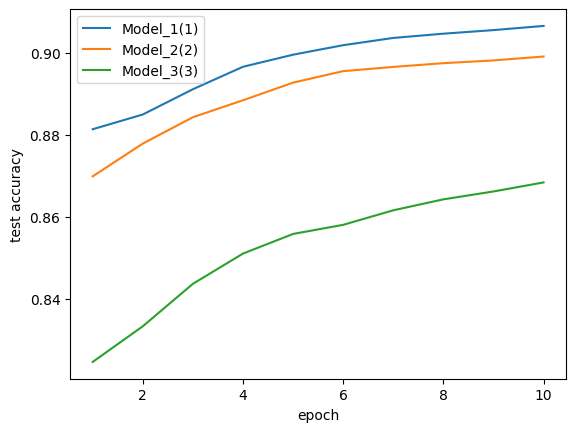

In [9]:
def main():
    # 指定设备
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('device is %s' % device)

    # 数据处理
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(0.5, 0.5)]
    )

    # 导入训练数据
    train_data = torchvision.datasets.FashionMNIST(root='./data', train=True,
                       transform=transform, download=True)
    train_data = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)

    # 导入测试数据
    test_data = torchvision.datasets.FashionMNIST(root='./data', train=False,
                      transform=transform, download=True)
    test_data = torch.utils.data.DataLoader(test_data, shuffle=True, num_workers=4)


    # 构造网络
    net_1 = Model_1()
    net_1.to(device)

    net_2 = Model_2()
    net_2.to(device)

    net_3 = Model_3()
    net_3.to(device)

    loss_function = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(net_1.parameters(), lr=0.001)
    optimizer_2 = optim.Adam(net_2.parameters(), lr=0.001)
    optimizer_3 = optim.Adam(net_3.parameters(), lr=0.001)

    # 训练网络
    # net_1.train()  None BN and Dropout
    num_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    correct_1 = 0
    total_1 = 0
    accuracy_1 = []

    correct_2 = 0
    total_2 = 0
    accuracy_2 = []

    correct_3 = 0
    total_3 = 0
    accuracy_3 = []

    # Model_1
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_1.zero_grad()
            outputs = net_1(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_1.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_1(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_1 += labels.size(0)
                correct_1 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_1.append(correct_1 / total_1)
    print('Model_1 Finished')

    # Model_2
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_2.zero_grad()
            outputs = net_2(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_2.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_2(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_2 += labels.size(0)
                correct_2 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_2.append(correct_2 / total_2)
    print('Model_2 Finished')

    # Model_3
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_3.zero_grad()
            outputs = net_3(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_3.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_3(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_3 += labels.size(0)
                correct_3 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_3.append(correct_3 / total_3)
    print('Model_3 Finished')

    plt.figure()
    plt.plot(num_epochs, accuracy_1, label='Model_1(1)')
    plt.plot(num_epochs, accuracy_2, label='Model_2(2)')
    plt.plot(num_epochs, accuracy_3, label='Model_3(3)')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.legend(loc='best')
    plt.show()


if __name__ == '__main__':
    main()

In [10]:
class Model_1(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_1, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*13*13, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_2(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5),
            # 特征图大小：16@24*24
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@12*12
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*12*12, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_3(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_3, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=7),
            # 特征图大小：16@22*22
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@11*11
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*11*11, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

device is cuda:0
Epoch:1 | Step:   500 | train_loss: 0.540
Epoch:1 | Step:  1000 | train_loss: 0.366
Epoch:1 | Step:  1500 | train_loss: 0.337
Epoch:2 | Step:   500 | train_loss: 0.275
Epoch:2 | Step:  1000 | train_loss: 0.267
Epoch:2 | Step:  1500 | train_loss: 0.259
Epoch:3 | Step:   500 | train_loss: 0.213
Epoch:3 | Step:  1000 | train_loss: 0.218
Epoch:3 | Step:  1500 | train_loss: 0.217
Epoch:4 | Step:   500 | train_loss: 0.176
Epoch:4 | Step:  1000 | train_loss: 0.183
Epoch:4 | Step:  1500 | train_loss: 0.184
Epoch:5 | Step:   500 | train_loss: 0.147
Epoch:5 | Step:  1000 | train_loss: 0.154
Epoch:5 | Step:  1500 | train_loss: 0.160
Epoch:6 | Step:   500 | train_loss: 0.119
Epoch:6 | Step:  1000 | train_loss: 0.133
Epoch:6 | Step:  1500 | train_loss: 0.131
Epoch:7 | Step:   500 | train_loss: 0.101
Epoch:7 | Step:  1000 | train_loss: 0.101
Epoch:7 | Step:  1500 | train_loss: 0.117
Epoch:8 | Step:   500 | train_loss: 0.078
Epoch:8 | Step:  1000 | train_loss: 0.088
Epoch:8 | Step:  

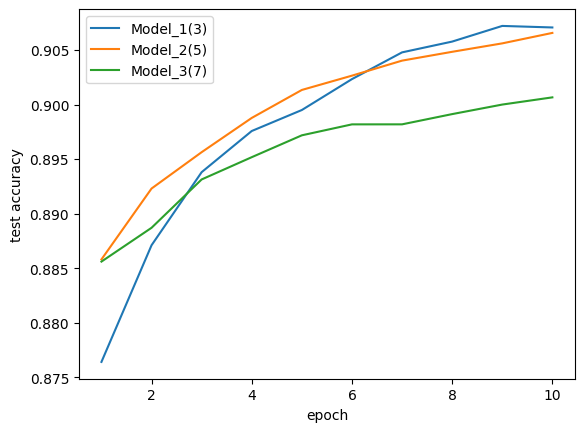

In [11]:
def main():
    # 指定设备
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('device is %s' % device)

    # 数据处理
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(0.5, 0.5)]
    )

    # 导入训练数据
    train_data = torchvision.datasets.FashionMNIST(root='./data', train=True,
                       transform=transform, download=True)
    train_data = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)

    # 导入测试数据
    test_data = torchvision.datasets.FashionMNIST(root='./data', train=False,
                      transform=transform, download=True)
    test_data = torch.utils.data.DataLoader(test_data, shuffle=True, num_workers=4)

    # 构造网络
    net_1 = Model_1()
    net_1.to(device)

    net_2 = Model_2()
    net_2.to(device)

    net_3 = Model_3()
    net_3.to(device)

    loss_function = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(net_1.parameters(), lr=0.001)
    optimizer_2 = optim.Adam(net_2.parameters(), lr=0.001)
    optimizer_3 = optim.Adam(net_3.parameters(), lr=0.001)

    # 训练网络
    # net_1.train()  None BN and Dropout
    num_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    correct_1 = 0
    total_1 = 0
    accuracy_1 = []

    correct_2 = 0
    total_2 = 0
    accuracy_2 = []

    correct_3 = 0
    total_3 = 0
    accuracy_3 = []

    # Model_1
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_1.zero_grad()
            outputs = net_1(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_1.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_1(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_1 += labels.size(0)
                correct_1 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_1.append(correct_1 / total_1)
    print('Model_1 Finished')

    # Model_2
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_2.zero_grad()
            outputs = net_2(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_2.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_2(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_2 += labels.size(0)
                correct_2 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_2.append(correct_2 / total_2)
    print('Model_2 Finished')

    # Model_3
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_3.zero_grad()
            outputs = net_3(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_3.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_3(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_3 += labels.size(0)
                correct_3 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_3.append(correct_3 / total_3)
    print('Model_3 Finished')

    plt.figure()
    plt.plot(num_epochs, accuracy_1, label='Model_1(3)')
    plt.plot(num_epochs, accuracy_2, label='Model_2(5)')
    plt.plot(num_epochs, accuracy_3, label='Model_3(7)')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.legend(loc='best')
    plt.show()


if __name__ == '__main__':
    main()

In [12]:
class Model_1(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_1, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*13*13, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_2(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 13 * 13, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_3(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_3, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*13*13, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_4(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_4, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 13 * 13, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x


class Model_5(nn.Module):

    def __init__(self, num_classes=10):
        super(Model_5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            # 特征图大小：16@26*26
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            # 特征图大小：16@13*13
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 13 * 13, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

device is cuda:0
Epoch:1 | Step:   500 | train_loss: 0.521
Epoch:1 | Step:  1000 | train_loss: 0.366
Epoch:1 | Step:  1500 | train_loss: 0.337
Epoch:2 | Step:   500 | train_loss: 0.269
Epoch:2 | Step:  1000 | train_loss: 0.266
Epoch:2 | Step:  1500 | train_loss: 0.252
Epoch:3 | Step:   500 | train_loss: 0.214
Epoch:3 | Step:  1000 | train_loss: 0.216
Epoch:3 | Step:  1500 | train_loss: 0.214
Epoch:4 | Step:   500 | train_loss: 0.172
Epoch:4 | Step:  1000 | train_loss: 0.175
Epoch:4 | Step:  1500 | train_loss: 0.189
Epoch:5 | Step:   500 | train_loss: 0.145
Epoch:5 | Step:  1000 | train_loss: 0.147
Epoch:5 | Step:  1500 | train_loss: 0.150
Epoch:6 | Step:   500 | train_loss: 0.117
Epoch:6 | Step:  1000 | train_loss: 0.128
Epoch:6 | Step:  1500 | train_loss: 0.129
Epoch:7 | Step:   500 | train_loss: 0.101
Epoch:7 | Step:  1000 | train_loss: 0.107
Epoch:7 | Step:  1500 | train_loss: 0.107
Epoch:8 | Step:   500 | train_loss: 0.080
Epoch:8 | Step:  1000 | train_loss: 0.084
Epoch:8 | Step:  

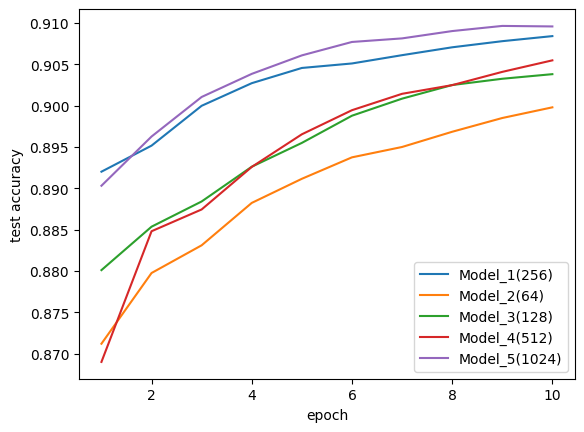

In [13]:
def main():
    # 指定设备
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('device is %s' % device)

    # 数据处理
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize(0.5, 0.5)]
    )

    # 导入训练数据
    train_data = torchvision.datasets.FashionMNIST(root='./data', train=True,
                       transform=transform, download=True)
    train_data = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)

    # 导入测试数据
    test_data = torchvision.datasets.FashionMNIST(root='./data', train=False,
                      transform=transform, download=True)
    test_data = torch.utils.data.DataLoader(test_data, shuffle=True, num_workers=4)

    # 构造网络
    net_1 = Model_1()
    net_1.to(device)

    net_2 = Model_2()
    net_2.to(device)

    net_3 = Model_3()
    net_3.to(device)

    net_4 = Model_4()
    net_4.to(device)

    net_5 = Model_5()
    net_5.to(device)

    loss_function = nn.CrossEntropyLoss()
    optimizer_1 = optim.Adam(net_1.parameters(), lr=0.001)
    optimizer_2 = optim.Adam(net_2.parameters(), lr=0.001)
    optimizer_3 = optim.Adam(net_3.parameters(), lr=0.001)
    optimizer_4 = optim.Adam(net_4.parameters(), lr=0.001)
    optimizer_5 = optim.Adam(net_5.parameters(), lr=0.001)

    # 训练网络
    # net_1.train()  None BN and Dropout
    num_epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    correct_1 = 0
    total_1 = 0
    accuracy_1 = []

    correct_2 = 0
    total_2 = 0
    accuracy_2 = []

    correct_3 = 0
    total_3 = 0
    accuracy_3 = []

    correct_4 = 0
    total_4 = 0
    accuracy_4 = []

    correct_5 = 0
    total_5 = 0
    accuracy_5 = []

    # Model_1
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_1.zero_grad()
            outputs = net_1(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_1.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_1(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_1 += labels.size(0)
                correct_1 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_1.append(correct_1 / total_1)
    print('Model_1 Finished')

    # Model_2
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_2.zero_grad()
            outputs = net_2(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_2.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_2(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_2 += labels.size(0)
                correct_2 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_2.append(correct_2 / total_2)
    print('Model_2 Finished')

    # Model_3
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_3.zero_grad()
            outputs = net_3(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_3.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()  # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_3(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_3 += labels.size(0)
                correct_3 += (predicted == labels.to(device)).sum().item()  # .item()获得张量中的值
        accuracy_3.append(correct_3 / total_3)
    print('Model_3 Finished')

    # Model_4
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_4.zero_grad()
            outputs = net_4(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_4.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_4(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_4 += labels.size(0)
                correct_4 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_4.append(correct_4 / total_4)
    print('Model_4 Finished')

    # Model_5
    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(train_data, start=0):
            inputs, labels = data
            optimizer_5.zero_grad()
            outputs = net_5(inputs.to(device))
            loss = loss_function(outputs, labels.to(device))
            loss.backward()
            optimizer_5.step()
            # 查看网络训练情况，每500步打印一次
            running_loss += loss.item()   # .item()获得张量里的值
            if i % 500 == 499:
                print('Epoch:%d | Step: %5d | train_loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
        # test accuracy
        with torch.no_grad():
            for data in test_data:
                inputs, labels = data
                outputs = net_5(inputs.to(device))
                _, predicted = torch.max(outputs.data, 1)
                total_5 += labels.size(0)
                correct_5 += (predicted == labels.to(device)).sum().item()   # .item()获得张量中的值
        accuracy_5.append(correct_5 / total_5)
    print('Model_5 Finished')

    plt.figure()
    plt.plot(num_epochs, accuracy_1, label='Model_1(256)')
    plt.plot(num_epochs, accuracy_2, label='Model_2(64)')
    plt.plot(num_epochs, accuracy_3, label='Model_3(128)')
    plt.plot(num_epochs, accuracy_4, label='Model_4(512)')
    plt.plot(num_epochs, accuracy_5, label='Model_5(1024)')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.legend(loc='best')
    plt.show()


if __name__ == '__main__':
    main()

In [28]:
import torch.nn.functional as F
#定义准确率作为评估标准
def accuracy(predictions, labels):
    pred = torch.max(predictions.data, 1)[1]            #torch.max()[0]返回最大值 torch.max()[1]返回最大值位置，既预测值
    rights = pred.eq(labels.data.view_as(pred)).sum()
    return rights, len(labels)                          #这里返回的是正确个数与总个数组成的元组



train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                              train=True,
                              transform=torchvision.transforms.ToTensor())

test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                             train=False,
                             transform=torchvision.transforms.ToTensor())
#构建 mini-batch
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size = 128,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = 128,
                                          shuffle=True)



class Model(nn.Module):

    def __init__(self, num_classes = 10):
        super(Model, self).__init__()
        self.Conv1 = nn.Conv2d(1, 64, 5) #24
        self.Pool1 = nn.MaxPool2d(2, 2) # 12
        self.Conv2 = nn.Conv2d(64,128, 5) #8
        self.Pool2 = nn.MaxPool2d(2, 2) #4
        self.Drop1 = nn.Dropout(0.3)
        self.FC1 = nn.Linear(128*4*4, 1024)
        self.Drop2 = nn.Dropout(0.3)
        self.FC2 = nn.Linear(1024, 1024)
        self.FC3 = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = F.relu(self.Conv1(x))
        x = self.Pool1(x)
        x = F.relu(self.Conv2(x))
        x = self.Pool2(x)
        x = x.view(-1, 128*4*4)
        x = F.relu(self.FC1(x))
        x = F.relu(self.FC2(x))
        x = self.FC3(x)
        return x
    
net = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
net.cuda()
test_right = []
train_loss = []

for epoch in range(10):
    train_rights = []
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()
        net.train()
        output = net(data)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        right = accuracy(output, target)
        train_rights.append(right)
        
        if batch_idx % 50 == 0:
            net.eval()
            val_rights = []
            
            for (data, target) in test_loader:
                data, target = data.cuda(), target.cuda()
                output = net(data)
                right = accuracy(output, target)
                val_rights.append(right)
            
            train_r = (sum([tup[0] for tup in train_rights]), sum([tup[1] for tup in train_rights]))
            val_r = (sum([tup[0] for tup in val_rights]), sum([tup[1] for tup in val_rights]))
            test_right.append((100*val_r[0]/val_r[1]).cpu().numpy())
            train_loss.append(loss.data.cpu().numpy())

            print(f'当前epoch:{epoch + 1} [{batch_idx * 128}/{len(train_loader.dataset)}]   \
                  损失：{loss.data:.6f}  训练集准确率：{100*train_r[0]/train_r[1]:.2f}%   测试集准确率：{100*val_r[0]/val_r[1]:.2f}%')

当前epoch:1 [0/60000]                     损失：2.305103  训练集准确率：5.47%   测试集准确率：10.00%
当前epoch:1 [6400/60000]                     损失：0.726978  训练集准确率：59.71%   测试集准确率：71.48%
当前epoch:1 [12800/60000]                     损失：0.572795  训练集准确率：67.33%   测试集准确率：77.15%
当前epoch:1 [19200/60000]                     损失：0.518153  训练集准确率：70.89%   测试集准确率：80.38%
当前epoch:1 [25600/60000]                     损失：0.476252  训练集准确率：73.61%   测试集准确率：82.50%
当前epoch:1 [32000/60000]                     损失：0.286576  训练集准确率：75.73%   测试集准确率：84.45%
当前epoch:1 [38400/60000]                     损失：0.375440  训练集准确率：77.40%   测试集准确率：82.86%
当前epoch:1 [44800/60000]                     损失：0.348107  训练集准确率：78.42%   测试集准确率：84.34%
当前epoch:1 [51200/60000]                     损失：0.254756  训练集准确率：79.47%   测试集准确率：85.80%
当前epoch:1 [57600/60000]                     损失：0.357276  训练集准确率：80.29%   测试集准确率：86.81%
当前epoch:2 [0/60000]                     损失：0.356124  训练集准确率：86.72%   测试集准确率：87.18%
当前epoch:2 [6400/60000]                     损失：0.29606

Text(0.5, 1.0, 'Test Accuracy')

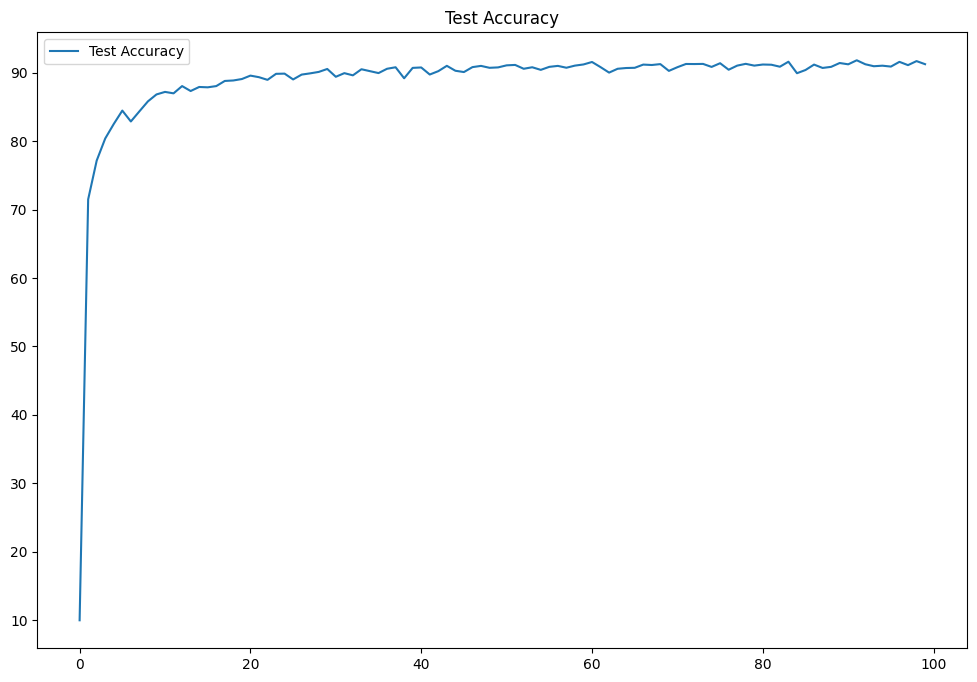

In [29]:
import pandas as pd
df = pd.DataFrame()
df['loss'] = train_loss
df['acc'] = test_right
plt.figure(figsize = (12, 8))
plt.plot(df['acc'], label = 'Test Accuracy')
plt.legend()
plt.title('Test Accuracy')

Text(0.5, 1.0, 'Train Loss')

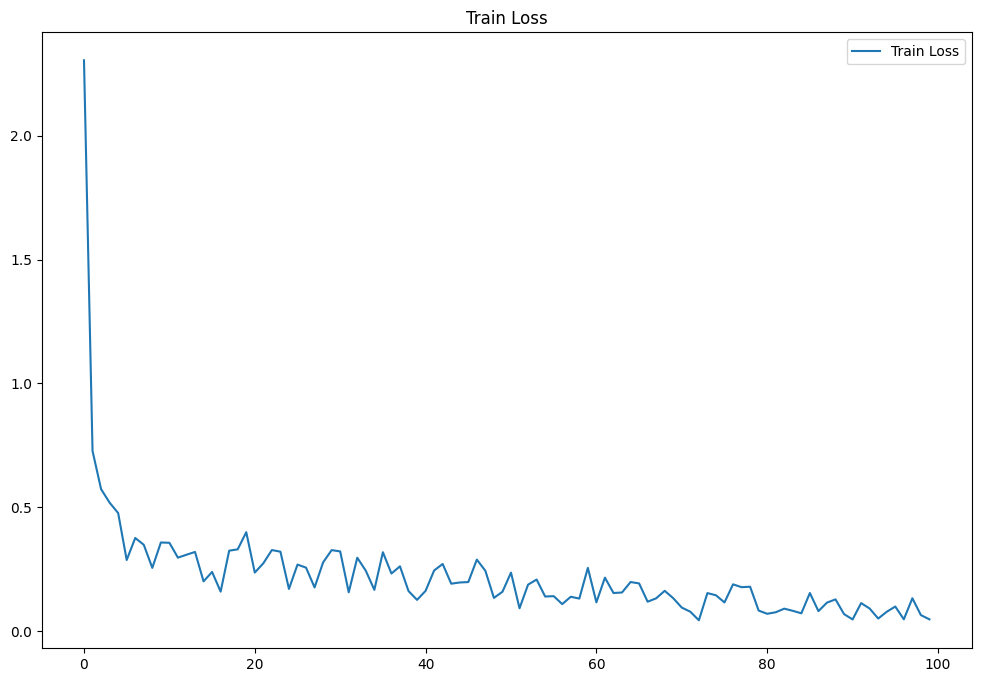

In [30]:
plt.figure(figsize = (12, 8))
plt.plot(df['loss'], label = 'Train Loss')
plt.legend()
plt.title('Train Loss')